In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import sys
import os
sys.path.insert(0, "../../../photoDAQ")
import file
from scipy.optimize import curve_fit

file.PATH = '/media/robert/Data_Storage/Data/Double_Probe_Diagnostic/'

In [2]:
# Load in all of the data taken
dataSets = {
    1 : (1806040001, 34),
    2 : (1806040005, 59),
    3 : (1806040006, 14),
    4 : (1806040007, 6),
    5 : (1806040009, 30),
    6 : (1806040010, 100),
    7 : (1806040011, 11),
    8 : (1806040013, 23) # After shot 23 the oscillation started and the signal was not longer distinguishable
}

N = 0 # Get the total number of traces taken
for i in dataSets:
    N += dataSets[i][1]
N-1
Np = 142
Nn = N-Np
data = np.zeros((N, 2500), dtype='double')
volt = np.zeros(N, dtype='double')
time = np.array(file.load_TRACE('TDS2024C', 1806040013, 23)['t'], dtype='double')
ind = 0
flag = True
for i in dataSets:
    shots = dataSets[i][1]
    for j in range(shots):
        if ind == 34 and flag: # This data point was from the buffered oscilloscope curve after the scope froze
            flag = False
            continue
        data[ind, :] = file.load_TRACE('TDS2024C', dataSets[i][0], j+1)['y']
        volt[ind] = file.load_SET('KA3005P', dataSets[i][0], j+1)['voltage']
        ind += 1
volt[Np:N] *= -1

{'t': array([ -4.90000000e-07,  -4.89000000e-07,  -4.88000000e-07, ...,
         2.00700000e-06,   2.00800000e-06,   2.00900000e-06]), 'y': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'meta': {'Byte number': 1, 'Bit number': 8, 'Encoding': 'BIN', 'Binary encoding': 'RI', 'Byte order': 'MSB', 'Data points': 2500, 'Wavefront ID': 'Ch1, DC coupling, 1.0E0 V/div, 2.5E-7 s/div, 2500 points, Average mode', 'Point format': 'Y', 'Sampling interval': 1e-09, 'Trigger offset': 0.0, 'Start time': -4.9e-07, 'Horizontal unit': 's', 'Vertical scale': 0.04, 'Conversion factor': 0.0, 'Vertical position': 65.0, 'Vertical units': 'Volts', 'INSTR': 'TDS2024C', 'ID': 'TEKTRONIX,TDS 2024C,C046401,CF:91.1CT FV:v24.26\n', 'Timestamp': '2018/06/04/15/27/52/873292', 'Data set': 1806040001, 'Shot number': 1}}


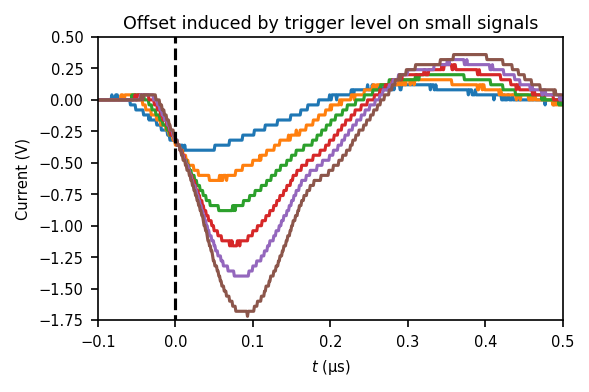

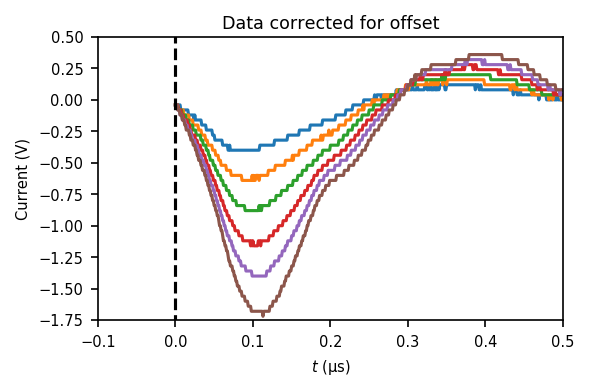

In [3]:
print(file.load_TRACE('TDS2024C', 1806040001, 1))
meta = file.load_TRACE('TDS2024C', 1806040001, 1)['meta']
        
plt.figure(figsize=(4, 2.5), dpi=150)
for i in range(6):
    plt.plot(time/1e-6, data[i, :])

plt.plot([0.0, 0.0], [-20, 20], 'k--')
plt.title("Offset induced by trigger level on small signals")
plt.xlim(-0.1, 0.5)
plt.ylim(-1.75, 0.5)
plt.xlabel(r'$t$ ($\mathrm{\mu s}$)')
plt.ylabel(r'Current (V)')
plt.show()

trigger = -0.01
dataShifted = np.zeros((N, 2500), dtype='double')
timeShifted = np.arange(0.0, meta["Sampling interval"]*meta["Data points"], meta["Sampling interval"])
for i in range(Np):
    for j in range(2500):
        if data[i, j] < trigger:
            ind = j
            break
    dataShifted[i, :] = np.roll(data[i, :], -ind)

plt.figure(figsize=(4, 2.5), dpi=150)
for i in range(6):
    plt.plot(timeShifted/1e-6, dataShifted[i, :])

plt.plot([0.0, 0.0], [-20, 20], 'k--')
plt.title("Data corrected for offset")
plt.xlim(-0.1, 0.5)
plt.ylim(-1.75, 0.5)
plt.xlabel(r'$t$ ($\mathrm{\mu s}$)')
plt.ylabel(r'Current (V)')
plt.show()

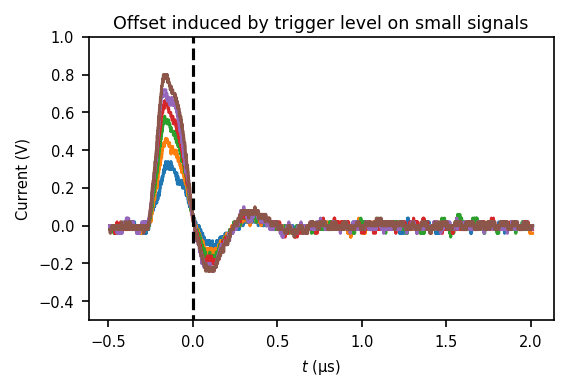

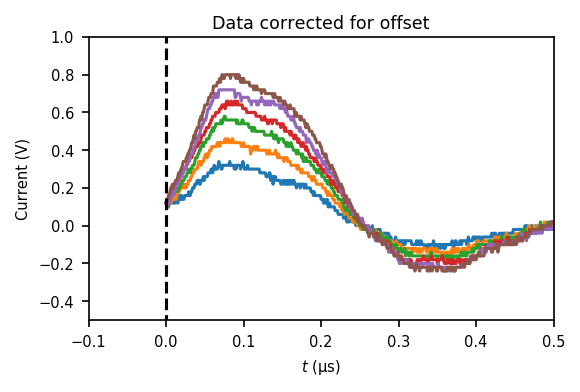

In [4]:
plt.figure(figsize=(4, 2.5), dpi=150)
for i in range(Np, Np+6):
    plt.plot(time/1e-6, data[i, :])

plt.plot([0.0, 0.0], [-20, 20], 'k--')
plt.title("Offset induced by trigger level on small signals")
#plt.xlim(-0.1, 0.5)
plt.ylim(-0.5, 1.0)
plt.xlabel(r'$t$ ($\mathrm{\mu s}$)')
plt.ylabel(r'Current (V)')
plt.show()

trigger = 0.1
for i in range(Np, N):
    for j in range(2500):
        if data[i, j] > trigger:
            ind = j
            break
    dataShifted[i, :] = np.roll(data[i, :], -ind)

plt.figure(figsize=(4, 2.5), dpi=150)
for i in range(Np, Np+6):
    plt.plot(timeShifted/1e-6, dataShifted[i, :])

plt.plot([0.0, 0.0], [-20, 20], 'k--')
plt.title("Data corrected for offset")
plt.xlim(-0.1, 0.5)
plt.ylim(-0.5, 1.0)
plt.xlabel(r'$t$ ($\mathrm{\mu s}$)')
plt.ylabel(r'Current (V)')
plt.show()

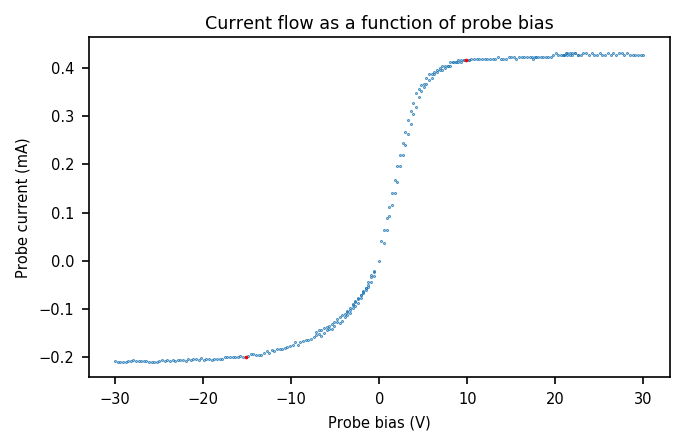

In [5]:
# Now lets look at a couple times and see what the current/voltage looks like
ind = 100
current = -dataShifted[:, ind]/10 #in mA

Ip1I = 65
Ip2I = 191
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(volt, current, '.', linestyle='none', markerSize=0.7)
plt.plot(volt[Ip1I], current[Ip1I], 'r.', linestyle='none', markerSize=1.5)
plt.plot(volt[Ip2I], current[Ip2I], 'r.', linestyle='none', markerSize=1.5)
plt.title('Current flow as a function of probe bias')
plt.xlabel('Probe bias (V)')
plt.ylabel('Probe current (mA)')
plt.show()

Temperature is 2.48 eV


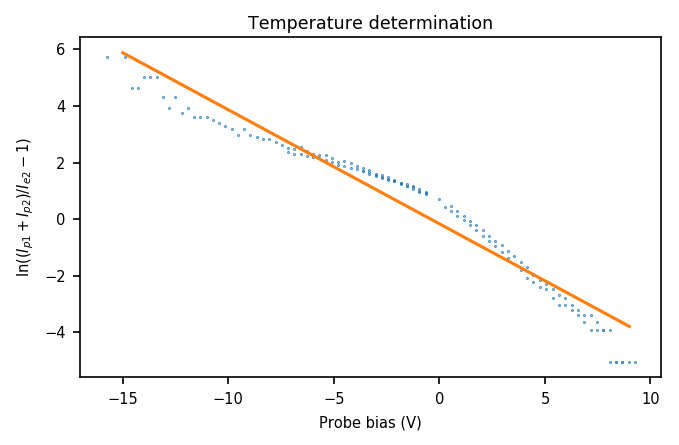

In [6]:
Ip1 = current[Ip1I]
Ip2 = -current[Ip2I]
sel = np.logical_and(current > -Ip2, current < Ip1)
Ie2 = current[sel] + Ip2
v = volt[sel]
log = np.log((Ip1+Ip2)/Ie2 - 1)

def line(x, m, b):
    return m*x + b

popt, pcov = curve_fit(line, v, log)
print('Temperature is %0.2f eV' % (-1/popt[0]))

vplot = np.linspace(-15, 9, 100)
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(v, log, '.', linestyle='none', markerSize=0.7)
plt.plot(vplot, line(vplot, *popt))
plt.title('Temperature determination')
plt.xlabel('Probe bias (V)')
plt.ylabel(r'$\ln((I_{p1}+I_{p2})/I_{e2}-1)$')
plt.show()

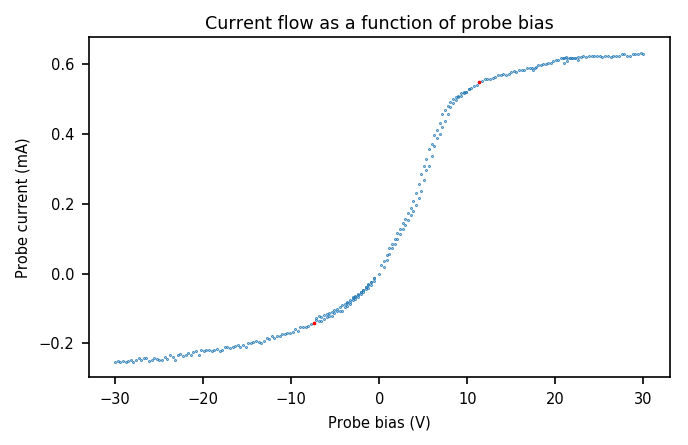

In [7]:
# Now lets look at a couple times and see what the current/voltage looks like
ind = 170
current = -dataShifted[:, ind]/10 #in mA

Ip1I = 70
Ip2I = 165
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(volt, current, '.', linestyle='none', markerSize=0.7)
plt.plot(volt[Ip1I], current[Ip1I], 'r.', linestyle='none', markerSize=1.5)
plt.plot(volt[Ip2I], current[Ip2I], 'r.', linestyle='none', markerSize=1.5)
plt.title('Current flow as a function of probe bias')
plt.xlabel('Probe bias (V)')
plt.ylabel('Probe current (mA)')
plt.show()

Temperature is 3.08 eV


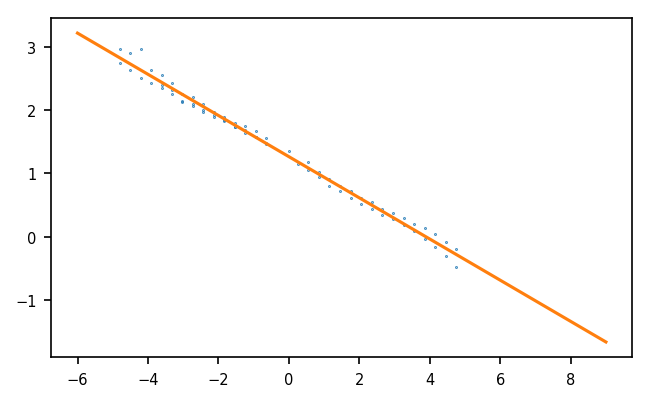

In [8]:
Ip1 = current[Ip1I]
Ip2 = -current[Ip2I]
sel = np.logical_and(volt > -5, volt < 5)
Ie2 = current[sel] + Ip2
v = volt[sel]
log = np.log((Ip1+Ip2)/Ie2 - 1)

def line(x, m, b):
    return m*x + b

popt, pcov = curve_fit(line, v, log)
print('Temperature is %0.2f eV' % (-1/popt[0]))

vplot = np.linspace(-6, 9, 100)
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(v, log, '.', linestyle='none', markerSize=0.7)
plt.plot(vplot, line(vplot, *popt))
plt.show()

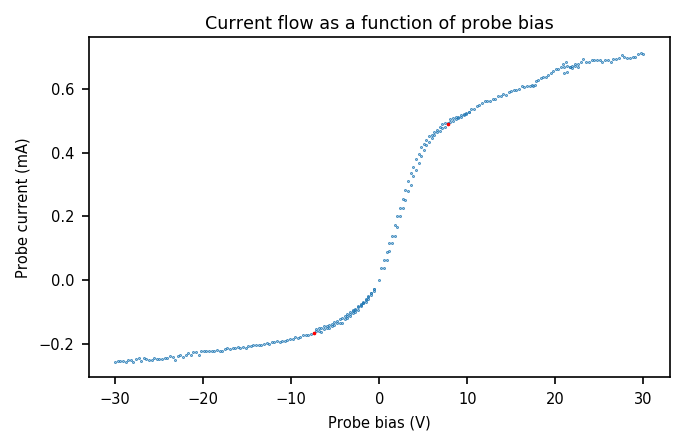

In [9]:
# Lets look at the peak values
# Now lets look at a couple times and see what the current/voltage looks like
ind = 100
current = np.zeros(N, dtype='double')
current[:Np] = np.amax(-dataShifted[:Np, :], axis=1)/10 #in mA
current[Np:] = -np.amax(dataShifted[Np:, :], axis=1)/10 #in mA

Ip1I = 58
Ip2I = 165
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(volt, current, '.', linestyle='none', markerSize=0.7)
plt.plot(volt[Ip1I], current[Ip1I], 'r.', linestyle='none', markerSize=1.5)
plt.plot(volt[Ip2I], current[Ip2I], 'r.', linestyle='none', markerSize=1.5)
plt.title('Current flow as a function of probe bias')
plt.xlabel('Probe bias (V)')
plt.ylabel('Probe current (mA)')
plt.show()

Temperature is 2.03 eV


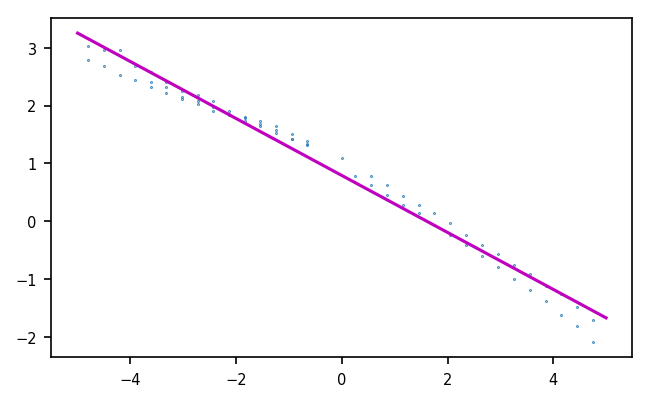

In [10]:
Ip1 = current[Ip1I]
Ip2 = -current[Ip2I]
sel = np.logical_and(volt > -5, volt < 5)
Ie2 = current[sel] + Ip2
v = volt[sel]
log = np.log((Ip1+Ip2)/Ie2 - 1)

def line(x, m, b):
    return m*x + b

popt, pcov = curve_fit(line, v, log)
print('Temperature is %0.2f eV' % (-1/popt[0]))

vplot = np.linspace(-5, 5, 100)
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(v, log, '.', linestyle='none', markerSize=0.7)
plt.plot(vplot, line(vplot, *popt), '-m')
plt.show()